Same model as the fastAIModel1 but here we are data augmenting

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
defaults.device = torch.device('cpu')

In [4]:
bs = 32

In [5]:
path = "./dataset-supply/"
train_path = os.path.join(path, 'train')
test_path = os.path.join(path, "test")
classes = os.listdir(train_path)

In [6]:
test_csv = os.path.join(path, 'test.csv')       # Path to test.csv file
test_images = os.path.join(path, 'test')        # Path to test images folder

## Processing & Data Augmentation

In [ ]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_wraps=0.4,
                     p_affine=1., p_lighting=1.
                     )

In [10]:
np.random.seed(43)
data = ImageDataBunch.from_folder(path,
                                  train='train',
                                  test='test',
                                  valid_pct=0.1, 
                                  ds_tfms=tfms,
                                  size=224,
                                  num_workers=4, bs=bs,
                                  no_check=True
                                 ).normalize(imagenet_stats)

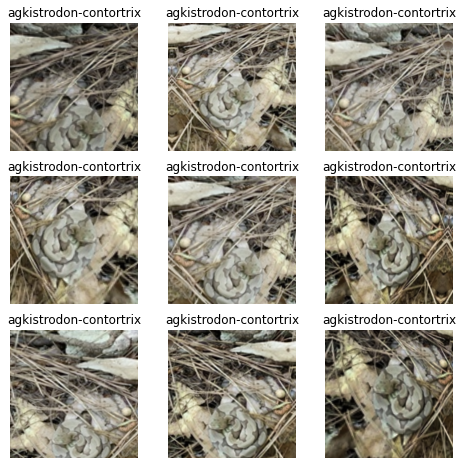

In [11]:
def _plot(i,j,ax):
    x,y = data.train_ds[6]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

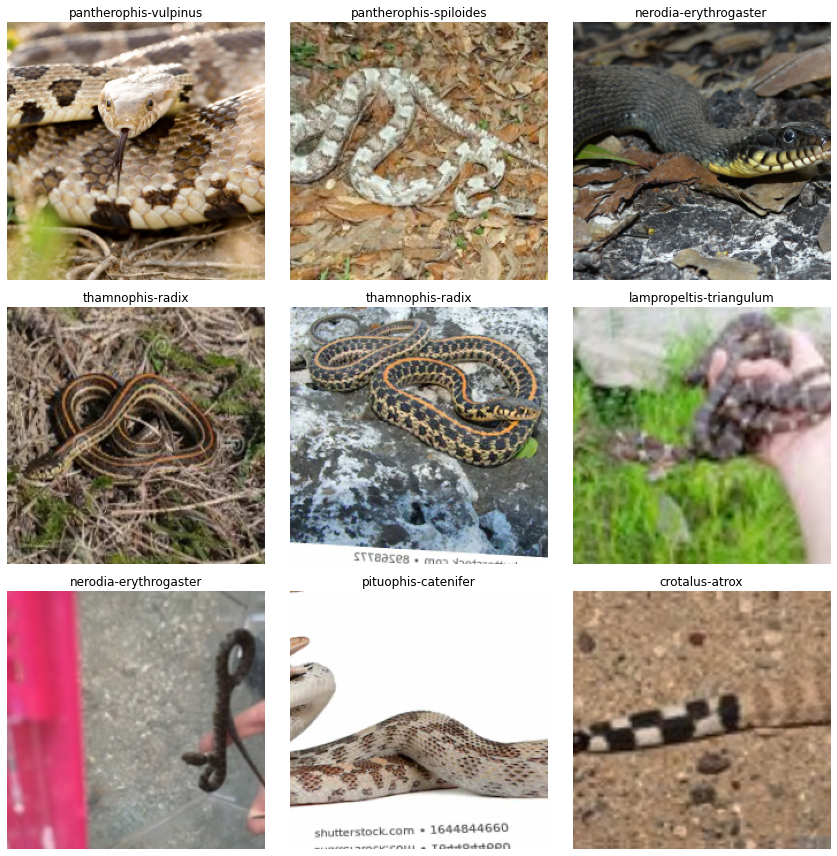

In [12]:
data.show_batch(rows=3, size=(7, 10))

## Training

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [ ]:
learn.fit_one_cycle(10)

In [10]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.420568,3.155459,0.790909,0.209091,02:18
1,3.656536,2.827001,0.734545,0.265455,02:13
2,3.165079,2.615472,0.721818,0.278182,02:13
3,2.787484,2.466727,0.690909,0.309091,02:14
4,2.616254,2.407556,0.672727,0.327273,02:23
5,2.467133,2.355860,0.667273,0.332727,02:15
6,2.348050,2.271730,0.667273,0.332727,02:13
7,2.244612,2.252811,0.645455,0.354545,02:13
8,2.140093,2.244897,0.661818,0.338182,02:14
9,2.117518,2.237036,0.652727,0.347273,02:17


In [11]:
learn.save('stage-3')

## Testing 

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [16]:
preds, y = learn.get_preds(data.test_ds)

In [17]:
filenames = pd.read_csv(test_csv)
filenames = np.array(filenames)

In [24]:
res = []
for img in filenames:
    path = os.path.join(test_path, str(img[0]) + ".jpg")
    tst = open_image(path)
    pred_class,pred_idx,outputs = learn.predict(tst)
    pred = pred_class.obj
    res.append(pred_class.obj)

In [25]:

def save_results(results):
    images = pd.read_csv(test_csv)['image_id']
    with open('fastAiRes-2-augmented.csv', 'w', newline='') as f:
        w = csv.writer(f)
        w.writerow(["image_id", "breed"])
        for i in range(len(images)):
            res = str(results[i])
            img = images[i]
            w.writerow([img, res])
            
save_results(res)

pantherophis-obsoletus
agkistrodon-piscivorus
pantherophis-obsoletus
storeria-dekayi
agkistrodon-contortrix
lampropeltis-triangulum
pantherophis-obsoletus
pantherophis-obsoletus
pantherophis-obsoletus
agkistrodon-piscivorus
thamnophis-sirtalis
pituophis-catenifer
crotalus-atrox
pantherophis-obsoletus
lampropeltis-californiae
crotalus-atrox
opheodrys-aestivus
crotalus-atrox
coluber-constrictor
nerodia-erythrogaster
crotalus-atrox
coluber-constrictor
crotalus-scutulatus
pantherophis-obsoletus
agkistrodon-contortrix
pituophis-catenifer
pituophis-catenifer
pituophis-catenifer
storeria-dekayi
pituophis-catenifer
pantherophis-emoryi
agkistrodon-contortrix
thamnophis-sirtalis
agkistrodon-piscivorus
thamnophis-sirtalis
storeria-dekayi
lampropeltis-triangulum
thamnophis-sirtalis
pituophis-catenifer
pantherophis-obsoletus
storeria-dekayi
nerodia-rhombifer
pituophis-catenifer
nerodia-sipedon
thamnophis-sirtalis
thamnophis-sirtalis
thamnophis-sirtalis
agkistrodon-contortrix
crotalus-atrox
thamnoph